In [6]:
# Importing the necessary Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import numpy as np 

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) # Adjust the configuration of the plots we will create


In [7]:
# Importing the csv file
df= pd.read_csv(r'C:\Users\hp\OneDrive\DA PROJECTS\DA with Python\Guided Project 2\movies.csv')

In [8]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [9]:
# Start by cleaning the data 
# Look for missing data by creating a for loop

for col in df.columns:
    pct_missing= np.mean(df[col].isnull())
    print('{}-{}%'.format(col, pct_missing)) #Percent missing

name-0.0%
rating-0.010041731872717789%
genre-0.0%
year-0.0%
released-0.0002608242044861763%
score-0.0003912363067292645%
votes-0.0003912363067292645%
director-0.0%
writer-0.0003912363067292645%
star-0.00013041210224308815%
country-0.0003912363067292645%
budget-0.2831246739697444%
gross-0.02464788732394366%
company-0.002217005738132499%
runtime-0.0005216484089723526%


In [10]:
# Check the data types
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [11]:
# Changing columns data types
df['budget']= df['budget'].astype('Int64')
df['gross']= df['gross'].astype('Int64')

In [12]:
# The released year and the year does not match so we can create a new column from the first four valus of the released year.
# change the released column from object to string data type

import re
df['correctYear'] = df['released'].astype(str).apply(lambda x: re.search(r'\d{4}', x).group() if re.search(r'\d{4}', x) else None)
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correctYear
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980


In [14]:
pd.set_option('display.max_rows', None)
#function used to configure how many rows of a DataFrame will be displayed when you print or inspect it.

In [15]:
# Check for any Duplicates 

df['company']=   df['company'].sort_values(ascending=False)
df['company']

# To drop duplicates 
df['company'].drop_duplicates()

0                                            Warner Bros.
1                                       Columbia Pictures
2                                               Lucasfilm
3                                      Paramount Pictures
4                                          Orion Pictures
6                                      Universal Pictures
7                            Chartoff-Winkler Productions
8                                          Dovemead Films
9                                          United Artists
10                                    The Malpaso Company
11                                           C.A.T. Films
14                                      Filmways Pictures
15                                        Rastar Pictures
16                              Metro-Goldwyn-Mayer (MGM)
17                                              IPC Films
18                                  AVCO Embassy Pictures
20                             Lorimar Film Entertainment
21            

Text(0.5, 1.0, 'Budget vs Gross Income')

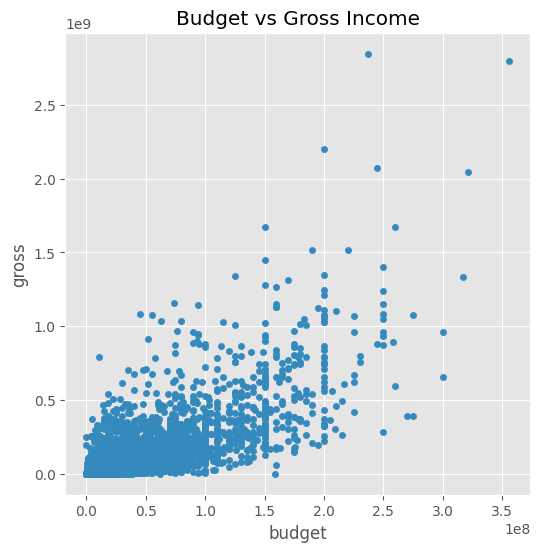

In [16]:
#To show  correlation between budget and gross
#Using scatter plot

df.plot(kind='scatter', x='budget', y='gross', figsize=(6,6))
plt.title('Budget vs Gross Income')

In [19]:
#To determine how the values are correlated
correlation_table= df[['budget','gross']]
corr= correlation_table.corr()
corr

# According to the output below their is a strong positive correlation. Meaning if the budget increases then the gross revenue also increases.

,budget,gross
budget,1.000000,0.740395
gross,0.740395,1.000000


In [20]:
df.describe()

,year,score,votes,budget,gross,runtime
count,7668.000000,7665.000000,7.665000e+03,5497.0,7479.0,7664.000000
mean,2000.405451,6.390411,8.810850e+04,35589876.192651,78500541.017783,107.261613
std,11.153508,0.968842,1.633238e+05,41457296.601931,165725124.318757,18.581247
min,1980.000000,1.900000,7.000000e+00,3000.0,309.0,55.000000
25%,1991.000000,5.800000,9.100000e+03,10000000.0,4532055.5,95.000000
50%,2000.000000,6.500000,3.300000e+04,20500000.0,20205757.0,104.000000
75%,2010.000000,7.100000,9.300000e+04,45000000.0,76016691.5,116.000000
max,2020.000000,9.300000,2.400000e+06,356000000.0,2847246203.0,366.000000


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         7668 non-null   object 
 1   rating       7591 non-null   object 
 2   genre        7668 non-null   object 
 3   year         7668 non-null   int64  
 4   released     7666 non-null   object 
 5   score        7665 non-null   float64
 6   votes        7665 non-null   float64
 7   director     7668 non-null   object 
 8   writer       7665 non-null   object 
 9   star         7667 non-null   object 
 10  country      7665 non-null   object 
 11  budget       5497 non-null   Int64  
 12  gross        7479 non-null   Int64  
 13  company      7651 non-null   object 
 14  runtime      7664 non-null   float64
 15  correctYear  7666 non-null   object 
dtypes: Int64(2), float64(3), int64(1), object(10)
memory usage: 973.6+ KB


<Axes: xlabel='budget', ylabel='gross'>

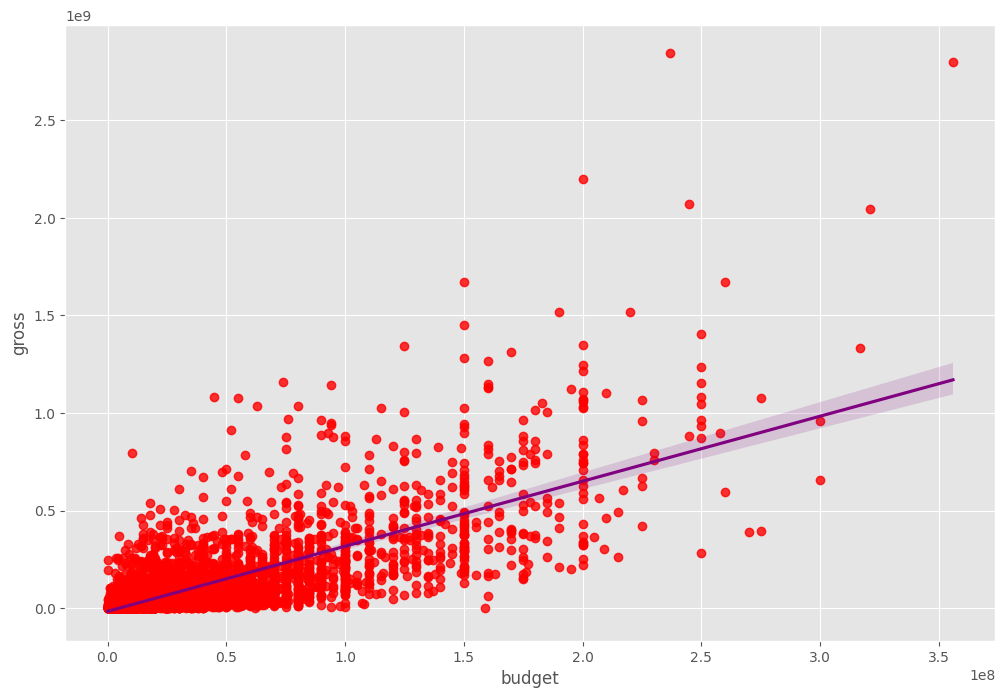

In [22]:
# Regression plot using seaborn
#Used to visualize the correlation
sns.regplot(x='budget', y='gross', data=df, scatter_kws={'color':'red'}, line_kws={'color':'purple'})

In [23]:
# Correlation only works on Numerical fields such as floats and integers
# Select the relevant columns
correlation_columns = ['year', 'score', 'votes', 'budget', 'gross', 'runtime']

# Compute the correlation matrix
correlation_matrix = df[correlation_columns].corr() #There are differnt methods of correlation

# Display the correlation matrix
print(correlation_matrix)

             year     score     votes    budget     gross   runtime
year     1.000000  0.097995  0.222945  0.329321  0.257486  0.120811
score    0.097995  1.000000  0.409182  0.076254  0.186258  0.399451
votes    0.222945  0.409182  1.000000  0.442429  0.630757  0.309212
budget   0.329321  0.076254  0.442429  1.000000  0.740395  0.320447
gross    0.257486  0.186258  0.630757  0.740395  1.000000  0.245216
runtime  0.120811  0.399451  0.309212  0.320447  0.245216  1.000000


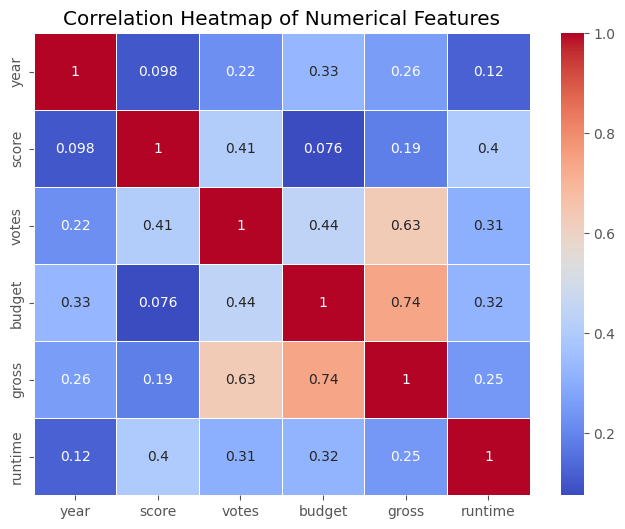

In [24]:
#Using heat maps to check on correlation
import matplotlib.pyplot as plt

%matplotlib inline

'''# heat map
fig = plt.figure(figsize=(8,8))
plt.matshow(corr, cmap='RdBu', fignum=fig.number)
plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical');
plt.yticks(range(len(corr.columns)), corr.columns);'''

# Select the relevant columns
correlation_columns = ['year', 'score', 'votes', 'budget', 'gross', 'runtime']

# Compute the correlation matrix
correlation_matrix = df[correlation_columns].corr()

# Set the figure size
plt.figure(figsize=(8, 6))

# Create the heatmap using Seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

# Add title
plt.title('Correlation Heatmap of Numerical Features')

# Display the heatmap
plt.show()

In [25]:
# High correlation between budget and gross 
# High correlation between votes and gross 

In [26]:
# Convert company to create a numeric representation for analysis
 #  We can also just convert other non-numeric to numeric
df_numerized= df

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype =='object'):
        df_numerized[col_name]=df_numerized[col_name].astype('category')
        df_numerized[col_name]=df_numerized[col_name].cat.codes

df_numerized.head(10)
        

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correctYear
0,6587,6,6,1980,1705,8.4,927000.0,2589,4014,1047,54,19000000,46998772,2319,146.0,0
1,5573,6,1,1980,1492,5.8,65000.0,2269,1632,327,55,4500000,58853106,731,104.0,0
2,5142,4,0,1980,1771,8.7,1200000.0,1111,2567,1745,55,18000000,538375067,1540,124.0,0
3,286,4,4,1980,1492,7.7,221000.0,1301,2000,2246,55,3500000,83453539,1812,88.0,0
4,1027,6,4,1980,1543,7.3,108000.0,1054,521,410,55,6000000,39846344,1777,98.0,0
5,2109,6,10,1980,2502,6.4,123000.0,2528,4362,241,55,550000,39754601,1812,95.0,0
6,5574,6,0,1980,1771,7.9,188000.0,1412,838,1277,55,27000000,115229890,2281,133.0,0
7,4436,6,3,1980,699,8.2,330000.0,1829,1769,2240,55,18000000,23402427,631,129.0,0
8,5281,4,0,1980,1753,6.8,101000.0,2306,1979,877,55,54000000,108185706,883,127.0,1
9,6213,6,3,1980,2286,7.0,10000.0,2864,423,589,55,10000000,15795189,2272,100.0,0


In [27]:
df_numerized.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         7668 non-null   int16  
 1   rating       7668 non-null   int8   
 2   genre        7668 non-null   int8   
 3   year         7668 non-null   int64  
 4   released     7668 non-null   int16  
 5   score        7665 non-null   float64
 6   votes        7665 non-null   float64
 7   director     7668 non-null   int16  
 8   writer       7668 non-null   int16  
 9   star         7668 non-null   int16  
 10  country      7668 non-null   int8   
 11  budget       5497 non-null   Int64  
 12  gross        7479 non-null   Int64  
 13  company      7668 non-null   int16  
 14  runtime      7664 non-null   float64
 15  correctYear  7668 non-null   int8   
dtypes: Int64(2), float64(3), int16(6), int64(1), int8(4)
memory usage: 494.4 KB


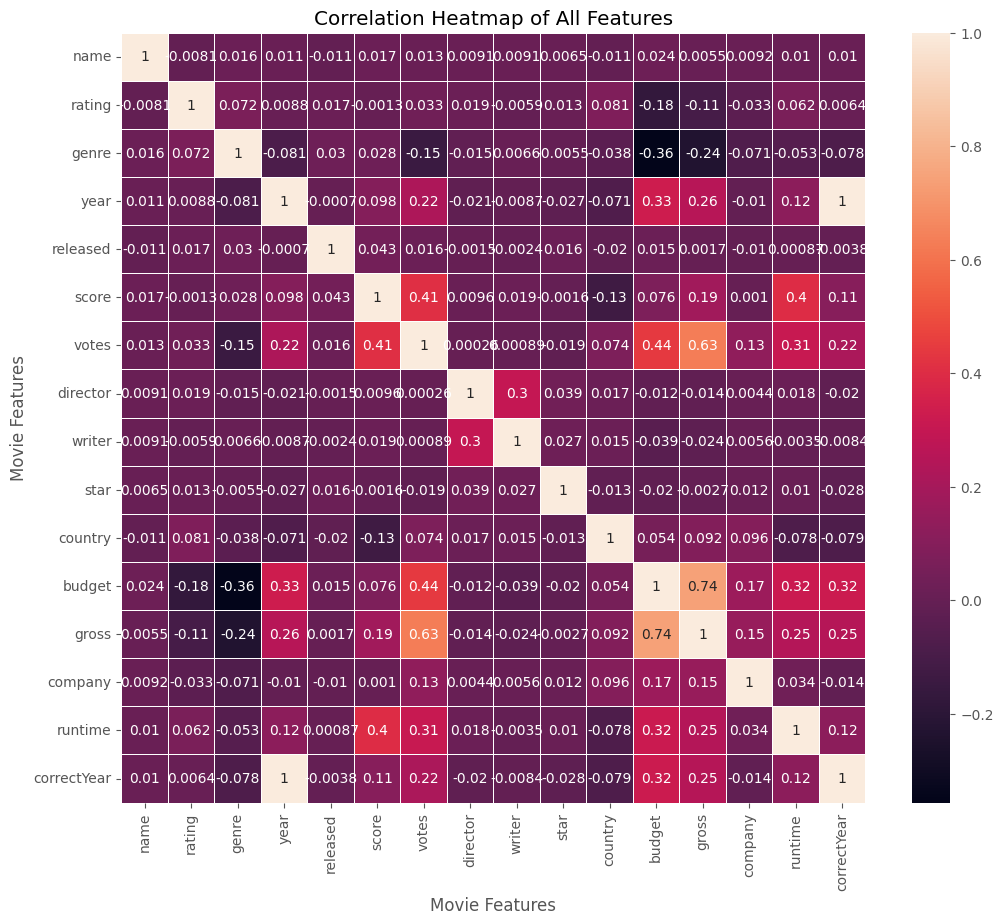

In [28]:
#Using heat map to check on correlation
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix for all columns
correlation_matrix = df.corr(method='pearson')

# Set the figure size
plt.figure(figsize=(12, 10))

# Create the heatmap using Seaborn
sns.heatmap(correlation_matrix, annot=True,  linewidths=0.5)

# Add title
plt.title('Correlation Heatmap of All Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

# Display the heatmap
plt.show()

In [29]:
df_numerized.corr(method='pearson')
correlation_matrix.unstack()

name         name           1.000000
             rating        -0.008069
             genre          0.016355
             year           0.011453
             released      -0.011311
             score          0.017097
             votes          0.013088
             director       0.009079
             writer         0.009081
             star           0.006472
             country       -0.010737
             budget         0.023970
             gross          0.005533
             company        0.009211
             runtime        0.010392
             correctYear    0.010225
rating       name          -0.008069
             rating         1.000000
             genre          0.072423
             year           0.008779
             released       0.016613
             score         -0.001314
             votes          0.033225
             director       0.019483
             writer        -0.005921
             star           0.013405
             country        0.081244
 

In [30]:
sorted_pairs=correlation_matrix.unstack().sort_values()
sorted_pairs

genre        budget        -0.356564
budget       genre         -0.356564
gross        genre         -0.235650
genre        gross         -0.235650
rating       budget        -0.176002
budget       rating        -0.176002
votes        genre         -0.145307
genre        votes         -0.145307
country      score         -0.133348
score        country       -0.133348
rating       gross         -0.107339
gross        rating        -0.107339
year         genre         -0.081261
genre        year          -0.081261
correctYear  country       -0.079009
country      correctYear   -0.079009
             runtime       -0.078412
runtime      country       -0.078412
correctYear  genre         -0.078210
genre        correctYear   -0.078210
             company       -0.071067
company      genre         -0.071067
country      year          -0.070938
year         country       -0.070938
genre        runtime       -0.052711
runtime      genre         -0.052711
writer       budget        -0.039451
b

In [31]:
#Displaying values with high correlation
high_corr= sorted_pairs[(sorted_pairs)>0.5]
high_corr

gross        votes          0.630757
votes        gross          0.630757
gross        budget         0.740395
budget       gross          0.740395
year         correctYear    0.996397
correctYear  year           0.996397
director     director       1.000000
votes        votes          1.000000
released     released       1.000000
score        score          1.000000
rating       rating         1.000000
name         name           1.000000
genre        genre          1.000000
year         year           1.000000
budget       budget         1.000000
country      country        1.000000
writer       writer         1.000000
star         star           1.000000
company      company        1.000000
gross        gross          1.000000
runtime      runtime        1.000000
correctYear  correctYear    1.000000
dtype: float64

In [32]:
# Votes and budget have high correlation with gross earning .